The main goal of this documentation is to design a classifier that classifies leafs in accordance to their properties. To this end, I will practice:
   - Looking at the form of data
   - Removing features that are highly correlated to others
   - Data Cleaning (treating skewness, and normalizing data)
   - Using Knn as a baseline classifier
   - Using support vector machine to improve performance
   - analysing algorithm performance using:
   

In [1]:
import pandas as pd
data = pd.read_csv('Dataset_feuilles_1.csv')

Let's first take a look at the data

In [2]:
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


The data contains 989 samples with 193 attributes.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


The column **species** represents the class that samples blong to. The leafs in this data set belongs to one of 99 different species or classes:

In [4]:
data['species'].value_counts()

Prunus_X_Shmittii               10
Eucalyptus_Neglecta             10
Eucalyptus_Urnigera             10
Quercus_x_Turneri               10
Quercus_Ilex                    10
                                ..
Quercus_Greggii                 10
Quercus_Vulcanica               10
Viburnum_x_Rhytidophylloides    10
Acer_Circinatum                 10
Salix_Fragilis                  10
Name: species, Length: 99, dtype: int64

## Take a look at the data

In below I have obtained some interesting information about the form of data.

In [5]:
data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


As the table above suggests, most of the attributes are skewed to the right, this is because for most of them the value of mean is greater than the value of the median(50%), which means the values of an attribute concentrated more in the right of their histogram.

This suggestion is proved by taking a look at the data plots:

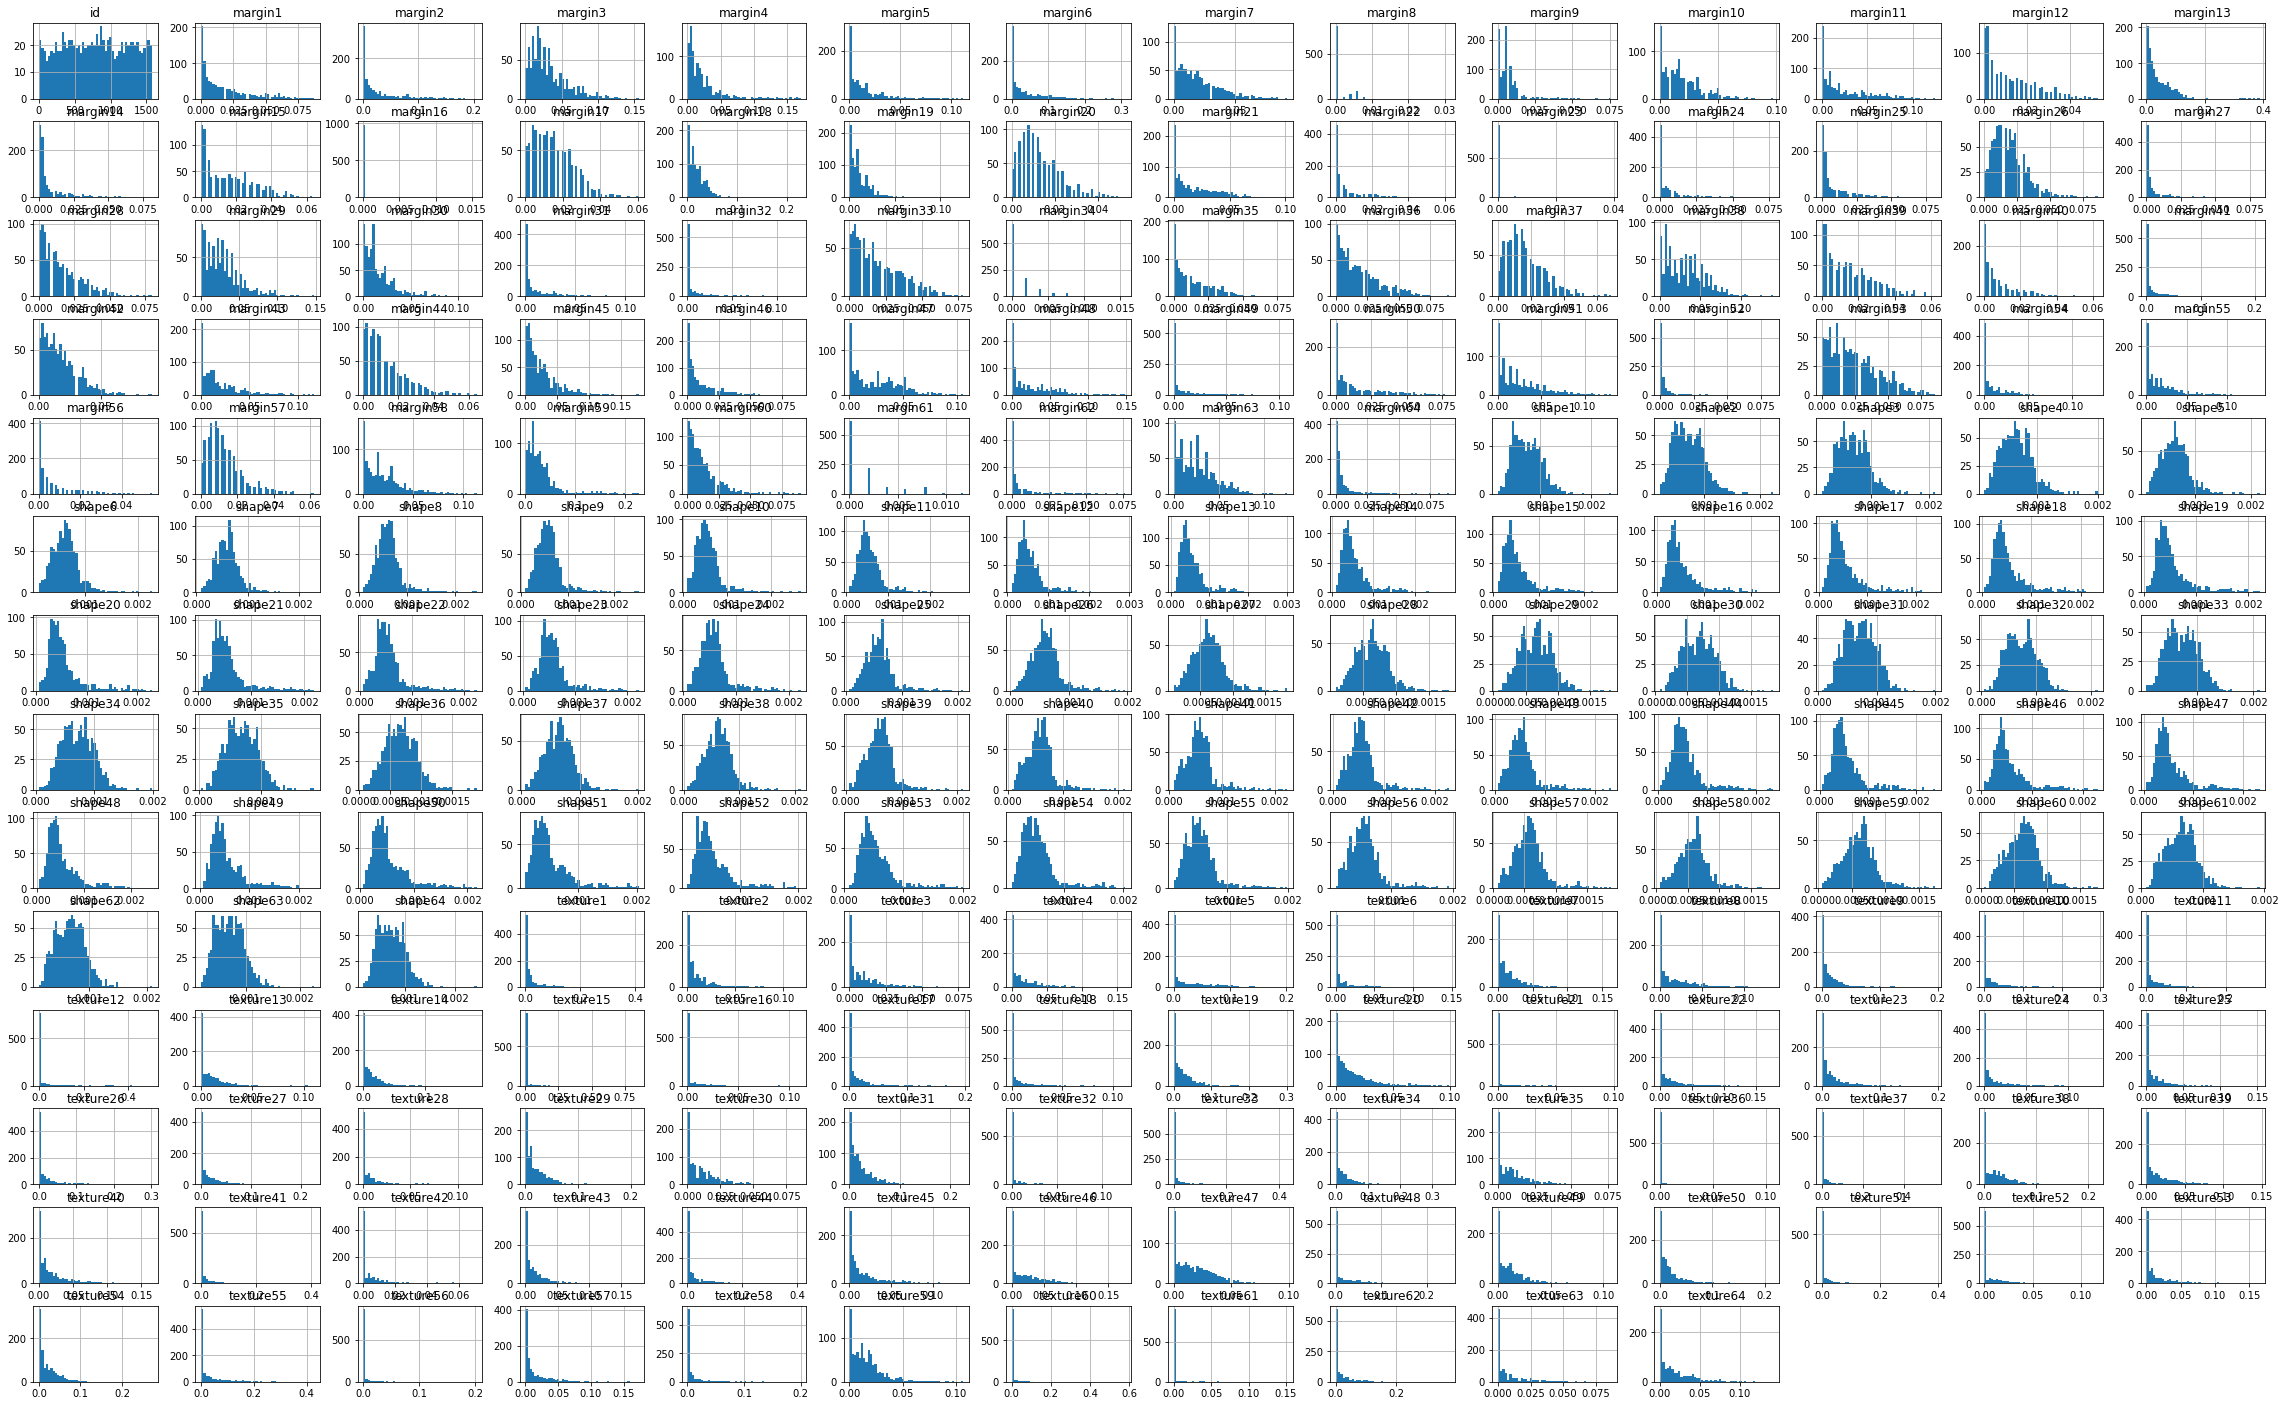

In [6]:
import matplotlib.pyplot as plt
data.hist(bins = 50 , figsize = (40,25))
plt.show()

### Example

Verifying the form of some attributes. For **margin1** the mean value is less greater than the median value. This suggests that the probability distribution of margin1 for the samples are more skewed to the right.

In [7]:
data["margin1"].mean()

0.017412358585858587

In [8]:
data["margin1"].median()

0.009766

In [9]:
data["margin1"].mode()

0    0.0
dtype: float64

This hypothesis can be confirmed by calculating the skew metric as well as Kurtosis metric for this attribute.

In [10]:
data["margin1"].skew()

1.3095606951906675

In [11]:
data["margin1"].kurtosis()

0.9423392599854723

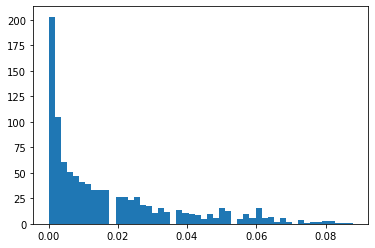

In [12]:
plt.hist(data["margin1"],50)
plt.show()

It would be useful as well to verify the correlation between the attributes. High correlation means there is a probability that there be more than one solution and as a result we get to the not optimized result.

In [13]:
correlation_matrix = data.corr()

<AxesSubplot:>

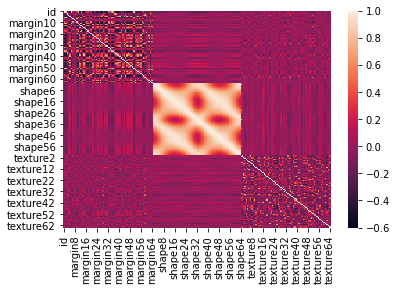

In [14]:
import seaborn as sns
sns.heatmap(correlation_matrix)

The dominant red color in this heat map illustrates a high correlation between some of the features, so it would be a good idea to remove one of the attributes if there are two attributes that are highly correlated.

To do that we consider the upper triangle matrix of the correlation matrix

In [15]:

import numpy as np
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


<ipython-input-15-ef4c8f4dbef2>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


In [16]:
columns = data.columns.drop('species')

In [17]:
to_drop = [column for column in columns if any(upper_tri[column] > 0.95) ]

In [18]:
list(data.columns)

['id',
 'species',
 'margin1',
 'margin2',
 'margin3',
 'margin4',
 'margin5',
 'margin6',
 'margin7',
 'margin8',
 'margin9',
 'margin10',
 'margin11',
 'margin12',
 'margin13',
 'margin14',
 'margin15',
 'margin16',
 'margin17',
 'margin18',
 'margin19',
 'margin20',
 'margin21',
 'margin22',
 'margin23',
 'margin24',
 'margin25',
 'margin26',
 'margin27',
 'margin28',
 'margin29',
 'margin30',
 'margin31',
 'margin32',
 'margin33',
 'margin34',
 'margin35',
 'margin36',
 'margin37',
 'margin38',
 'margin39',
 'margin40',
 'margin41',
 'margin42',
 'margin43',
 'margin44',
 'margin45',
 'margin46',
 'margin47',
 'margin48',
 'margin49',
 'margin50',
 'margin51',
 'margin52',
 'margin53',
 'margin54',
 'margin55',
 'margin56',
 'margin57',
 'margin58',
 'margin59',
 'margin60',
 'margin61',
 'margin62',
 'margin63',
 'margin64',
 'shape1',
 'shape2',
 'shape3',
 'shape4',
 'shape5',
 'shape6',
 'shape7',
 'shape8',
 'shape9',
 'shape10',
 'shape11',
 'shape12',
 'shape13',
 'shape14',

In [19]:
to_drop.append('id')

In [20]:
print(to_drop)

['shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape21', 'shape22', 'shape23', 'shape24', 'shape25', 'shape26', 'shape27', 'shape28', 'shape29', 'shape30', 'shape31', 'shape32', 'shape33', 'shape34', 'shape35', 'shape36', 'shape37', 'shape38', 'shape39', 'shape40', 'shape41', 'shape42', 'shape43', 'shape44', 'shape45', 'shape46', 'shape47', 'shape48', 'shape49', 'shape50', 'shape51', 'shape52', 'shape53', 'shape54', 'shape55', 'shape56', 'shape57', 'shape58', 'shape59', 'shape60', 'shape61', 'shape62', 'shape63', 'shape64', 'id']


Now we can define a transformer whose job is to drop the attributes speified in to_drop.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropAttributes(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y = None):
        
        return self
    def transform(self, X, y = None):
        return X.drop(X[to_drop], axis = 1)

In [22]:
data.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [23]:
attr_drop = DropAttributes()
data1 = attr_drop.fit_transform(data)

In [24]:
data1

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [25]:
data1.shape

(990, 130)

As it is illustrated, the number of features is reduced to 130. It means 192-130= 62 features are corresponds to others, and therefore, we can drop them.

### How to handle this skewness of data?

One way to deal with skewed data is to use log transformation. To do that I can use the **apply** method in pandas. 

The second way is to use normalization with min_max method.

# Data Cleaning 

Since the train and test sets have been already separated, in order to evaluate performance of the algorithms and to regularize them I first divide the dataset into train set and validation set.

# Choosing train and test

Since there are 990 samples and each of the classes repeated 10 times, to have a good sample the best is to divide into train and validation set in a way that proportion of samples belonging to each class remains the same in both of the train and val sets.

In [26]:
X_train = data1.iloc[:,1:]

In [27]:
y_train = data1.iloc[:,0]

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(data1, data1["species"]):
        train = data1.loc[train_index]
        val = data1.loc[test_index]

In [27]:
train["species"].value_counts()

Prunus_X_Shmittii        8
Eucalyptus_Neglecta      8
Quercus_Trojana          8
Quercus_Ilex             8
Quercus_Imbricaria       8
                        ..
Acer_Saccharinum         8
Quercus_Greggii          8
Quercus_Pontica          8
Pterocarya_Stenoptera    8
Betula_Pendula           8
Name: species, Length: 99, dtype: int64

In [28]:
val["species"].value_counts()

Prunus_X_Shmittii               2
Eucalyptus_Neglecta             2
Quercus_Trojana                 2
Quercus_Ilex                    2
Quercus_Imbricaria              2
                               ..
Quercus_Coccifera               2
Viburnum_x_Rhytidophylloides    2
Acer_Circinatum                 2
Acer_Capillipes                 2
Betula_Pendula                  2
Name: species, Length: 99, dtype: int64

In [29]:
X_train , y_train = train.iloc[:,1:], train.iloc[:,0]
X_val , y_val = val.iloc[:,1:] , val.iloc[:,0]

In [30]:
X_train

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
207,0.000000,0.000000,0.070312,0.136720,0.005859,0.000000,0.000000,0.000000,0.001953,0.000000,...,0.038086,0.000000,0.002930,0.000000,0.017578,0.0,0.000000,0.000977,0.000977,0.000977
252,0.003906,0.001953,0.058594,0.048828,0.005859,0.017578,0.000000,0.000000,0.048828,0.000000,...,0.175780,0.000977,0.005859,0.000000,0.006836,0.0,0.010742,0.000000,0.011719,0.000000
10,0.019531,0.031250,0.001953,0.005859,0.003906,0.013672,0.033203,0.000000,0.011719,0.042969,...,0.009766,0.000000,0.000000,0.002930,0.024414,0.0,0.000000,0.006836,0.000000,0.004883
865,0.052734,0.140630,0.000000,0.003906,0.000000,0.117190,0.013672,0.000000,0.007812,0.029297,...,0.022461,0.000000,0.002930,0.000000,0.003906,0.0,0.000000,0.009766,0.002930,0.000000
497,0.009766,0.031250,0.072266,0.005859,0.017578,0.042969,0.041016,0.005859,0.000000,0.013672,...,0.117190,0.000000,0.000977,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.039062,0.042969,0.021484,0.009766,0.003906,0.130860,0.015625,0.000000,0.005859,0.048828,...,0.000000,0.000000,0.050781,0.000977,0.029297,0.0,0.000000,0.000977,0.034180,0.024414
829,0.015625,0.005859,0.031250,0.033203,0.007812,0.009766,0.041016,0.003906,0.000000,0.017578,...,0.041016,0.000000,0.059570,0.000000,0.000977,0.0,0.000000,0.000000,0.018555,0.030273
528,0.000000,0.000000,0.031250,0.005859,0.054688,0.000000,0.005859,0.000000,0.009766,0.003906,...,0.039062,0.039062,0.007812,0.009766,0.019531,0.0,0.000000,0.029297,0.002930,0.012695
344,0.000000,0.000000,0.070312,0.160160,0.007812,0.000000,0.000000,0.000000,0.011719,0.000000,...,0.089844,0.000000,0.002930,0.001953,0.017578,0.0,0.026367,0.017578,0.003906,0.015625


## Standardization of Data to make variance and mean the same for all features

In [31]:
X_train.var()

margin1      0.000377
margin2      0.001522
margin3      0.000653
margin4      0.000842
margin5      0.000349
               ...   
texture60    0.003228
texture61    0.000137
texture62    0.001501
texture63    0.000189
texture64    0.000521
Length: 129, dtype: float64

In [32]:
X_train.mean()

margin1      0.017117
margin2      0.028626
margin3      0.031669
margin4      0.023393
margin5      0.014239
               ...   
texture60    0.013245
texture61    0.002746
texture62    0.020210
texture63    0.009036
texture64    0.019609
Length: 129, dtype: float64

Now first problem with this data is that the variances of the attributes are different, and they are also centered around different values. So one possibility to solve this issue is to standardize the data (subtracting by mean and deviding by standard deviation).

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
_= ss.fit(X_train)
X_train_standard = pd.DataFrame(ss.transform(X_train) , columns = X_train.columns)

In [34]:
X_train_standard['margin1'].skew()

1.307992769854673

In [35]:
X_train['margin1'].skew()

1.307992769854673

Note that standardization does not change skewness of data!

To find the best way to normalize our data, we use three different methods and evaluate the skewness fator after implementing each one on the data.Especially, we are using:
   - power transformer(yeo-johnson)
   - power transformer(Box-Cox)
   - log transformation

### Another method in order to make the data more normal is to use non-linear transformers like log-transformation and power transformer (yeo-johnson method).

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_pt = pd.DataFrame(pt.fit_transform(X_train_standard), columns = X_train.columns)

In [37]:
X_train_pt['margin1'].skew()

0.2944553048839115

Now it is much more normal! and it is possible to use if after standardscaler.

## PowerTransformer Box-Cox

In order to use Box-Cox method, the data should be strictly positive.So I will use MinmaxScaler to make the data positive, then if it was necessary, I will replace zero's with a very small value.

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mms = pd.DataFrame(mms.fit_transform(X_train_standard), columns = X_train.columns)

In [39]:
X_train_mms

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.000000,0.000000,0.545435,0.804614,0.052627,0.000000,0.000000,0.000000,0.029410,0.000000,...,0.088636,0.000000,0.016951,0.000000,0.165129,0.0,0.000000,0.002599,0.011241,0.008337
1,0.046509,0.009523,0.454534,0.287359,0.052627,0.056603,0.000000,0.000000,0.735295,0.000000,...,0.409086,0.005078,0.033896,0.000000,0.064218,0.0,0.070965,0.000000,0.134834,0.000000
2,0.232556,0.152380,0.015150,0.034481,0.035085,0.044025,0.361700,0.000000,0.176475,0.440004,...,0.022728,0.000000,0.000000,0.014635,0.229347,0.0,0.000000,0.018182,0.000000,0.041667
3,0.627905,0.685732,0.000000,0.022987,0.000000,0.377363,0.148937,0.000000,0.117640,0.300002,...,0.052273,0.000000,0.016951,0.000000,0.036693,0.0,0.000000,0.025975,0.033711,0.000000
4,0.116284,0.152380,0.560593,0.034481,0.157891,0.138364,0.446812,0.187488,0.000000,0.140002,...,0.272732,0.000000,0.005652,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.033330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.465112,0.209523,0.166659,0.057474,0.035085,0.421381,0.170213,0.000000,0.088230,0.500000,...,0.000000,0.000000,0.293787,0.004880,0.275218,0.0,0.000000,0.002599,0.393262,0.208328
788,0.186047,0.028569,0.242417,0.195404,0.070170,0.031447,0.446812,0.124992,0.000000,0.179999,...,0.095455,0.000000,0.344634,0.000000,0.009178,0.0,0.000000,0.000000,0.213487,0.258324
789,0.000000,0.000000,0.242417,0.034481,0.491224,0.000000,0.063826,0.000000,0.147065,0.039998,...,0.090907,0.203046,0.045195,0.048781,0.183476,0.0,0.000000,0.077922,0.033711,0.108328
790,0.000000,0.000000,0.545435,0.942561,0.070170,0.000000,0.000000,0.000000,0.176475,0.000000,...,0.209090,0.000000,0.016951,0.009755,0.165129,0.0,0.174189,0.046752,0.044941,0.133330


In [40]:
X_train_mms.replace(0, 10 ** -5 , inplace = True)

In [41]:
X_train_mms

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.000010,0.000010,0.545435,0.804614,0.052627,0.000010,0.000010,0.000010,0.029410,0.000010,...,0.088636,0.000010,0.016951,0.000010,0.165129,0.00001,0.000010,0.002599,0.011241,0.008337
1,0.046509,0.009523,0.454534,0.287359,0.052627,0.056603,0.000010,0.000010,0.735295,0.000010,...,0.409086,0.005078,0.033896,0.000010,0.064218,0.00001,0.070965,0.000010,0.134834,0.000010
2,0.232556,0.152380,0.015150,0.034481,0.035085,0.044025,0.361700,0.000010,0.176475,0.440004,...,0.022728,0.000010,0.000010,0.014635,0.229347,0.00001,0.000010,0.018182,0.000010,0.041667
3,0.627905,0.685732,0.000010,0.022987,0.000010,0.377363,0.148937,0.000010,0.117640,0.300002,...,0.052273,0.000010,0.016951,0.000010,0.036693,0.00001,0.000010,0.025975,0.033711,0.000010
4,0.116284,0.152380,0.560593,0.034481,0.157891,0.138364,0.446812,0.187488,0.000010,0.140002,...,0.272732,0.000010,0.005652,0.000010,0.000010,0.00001,0.000010,0.000010,0.000010,0.033330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0.465112,0.209523,0.166659,0.057474,0.035085,0.421381,0.170213,0.000010,0.088230,0.500000,...,0.000010,0.000010,0.293787,0.004880,0.275218,0.00001,0.000010,0.002599,0.393262,0.208328
788,0.186047,0.028569,0.242417,0.195404,0.070170,0.031447,0.446812,0.124992,0.000010,0.179999,...,0.095455,0.000010,0.344634,0.000010,0.009178,0.00001,0.000010,0.000010,0.213487,0.258324
789,0.000010,0.000010,0.242417,0.034481,0.491224,0.000010,0.063826,0.000010,0.147065,0.039998,...,0.090907,0.203046,0.045195,0.048781,0.183476,0.00001,0.000010,0.077922,0.033711,0.108328
790,0.000010,0.000010,0.545435,0.942561,0.070170,0.000010,0.000010,0.000010,0.176475,0.000010,...,0.209090,0.000010,0.016951,0.009755,0.165129,0.00001,0.174189,0.046752,0.044941,0.133330


In [42]:
ptb = PowerTransformer(method='box-cox')
X_train_ptb = pd.DataFrame(ptb.fit_transform(X_train_mms), columns = X_train.columns)


<AxesSubplot:>

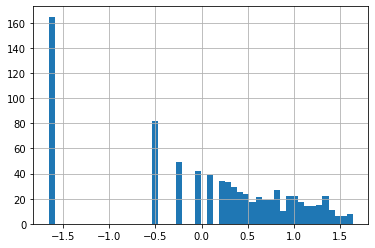

In [43]:
X_train_ptb['margin1'].hist(bins = 50)

In [44]:
X_train_ptb['margin1'].skew()

-0.5199045243046035

Apparently this result is not as promissing as that of yeo-johnsson powerTransformer

## In below we have applied log-transform to normalize data, but still it does not provide a good result

In [45]:
import numpy as np
X_train_log = X_train_mms.apply(lambda x: np.log(x))

In [46]:
X_val_mms = pd.DataFrame(mms.fit_transform(X_val), columns = X_train.columns)


In [47]:
X_val_mms.replace(0,10 ** -30 , inplace = True)

In [48]:
X_val_log = X_val_mms.apply(lambda x: np.log(x))

In [49]:
X_val_log.tail()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
193,-2.708118,-3.320296,-1.203973,-1.877713,-0.200684,-2.590296,-1.791747,-69.077553,-69.077553,-2.110275,...,-69.077553,-69.077553,-2.772550,-69.077553,-1.452271,-69.077553,-69.077553,-69.077553,-0.025013,-1.841226
194,-0.223155,-0.547643,-1.548817,-4.442742,-69.077553,-0.430829,-2.351436,-69.077553,-2.970480,-0.857439,...,-0.798150,-69.077553,-1.313978,-69.077553,-2.751601,-69.077553,-69.077553,-69.077553,-3.701372,-2.337656
195,-1.609449,-2.020967,-0.693147,-4.442742,-2.397965,-1.696465,-0.904457,-69.077553,-69.077553,-1.887029,...,-5.801664,-69.077553,-2.877956,-1.379697,-1.710056,-3.744449,-69.077553,-3.589033,-69.077553,-0.686264
196,-3.806731,-3.725761,-2.184809,-2.650897,-2.397965,-69.077553,-1.252739,0.000000,-2.565015,-2.110275,...,-0.684093,-69.077553,-3.688943,-3.918555,-1.904230,-69.077553,-69.077553,-3.945737,-69.077553,-1.575521
197,-69.077553,-69.077553,-0.948037,-1.075375,-3.091112,-69.077553,-69.077553,-69.077553,-0.444690,-2.803422,...,-0.733230,-2.934849,-4.382091,-5.016826,-1.285185,-69.077553,-1.466374,-4.505426,-2.315077,-4.283640


array([[<AxesSubplot:title={'center':'margin1'}>,
        <AxesSubplot:title={'center':'margin2'}>]], dtype=object)

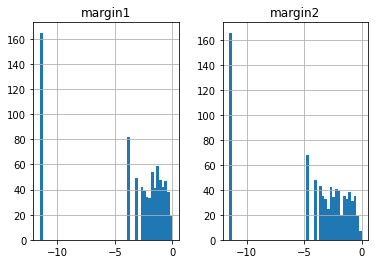

In [50]:
X_train_log[['margin1','margin2']].hist(bins = 50)

In [51]:
X_train_log['margin1'].skew()

-1.2366621736698264

In [52]:
X_train['margin1'].skew()

1.307992769854673

This skew number indicates that the log-transformer is not able to normalie this data.

Hence, the best method to normalize this data, the  best method is to use power transformer yoe johnson.

Since we eant to use the same data cleaning procedure in a while in the test data, we create a pipeline

In [53]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('drop_attribute' , DropAttributes() ),
    ('power_transformer' , PowerTransformer()),
    ('standard_scaler' , StandardScaler()),
])

### Learning models

The first cleaning task is to separate attributes from the labels and use numerical values for the labels.

In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_val = labelencoder.fit_transform(y_val)

I have used k_nearest neighbor as a baseline.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train_pt,y_train)

KNeighborsClassifier()

## Evaluating performance of the Knn

K-nearest neighbor is a soft classifier(or scoring classifier). The data set that we are working on is a balanced one, so we can use accuracy-score, precision,recall, as well as F1-score. Since the method predict-proba is defined for KNN, we can calculate Area under ROC curve. Since all of these are defined based on the confusion matrix, let's first calculate it.

In [56]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn_clf, X_train_pt, y_train, cv = 3)

In [57]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train , y_train_pred)

In [58]:
conf_mx

array([[8, 0, 0, ..., 0, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       [0, 0, 8, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 8, 0, 0],
       [0, 0, 0, ..., 0, 8, 0],
       [0, 0, 0, ..., 0, 0, 7]])

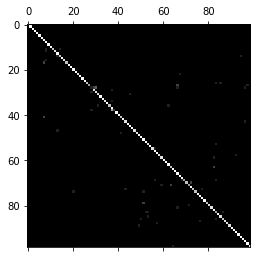

In [59]:
from matplotlib import pyplot as plt
plt.matshow(conf_mx, cmap = plt.cm.gray)

Let's start to calculate accuracy score , precision and recall. To do that, we need to use a validation set, and evaluate predictions over that.

In [60]:
ssv = StandardScaler()
_= ssv.fit(X_val)
X_val_standard = pd.DataFrame(ss.transform(X_val) , columns = X_val.columns)
X_val_pt = pd.DataFrame(pt.fit_transform(X_val_standard),columns = X_val.columns)

In [61]:
predictions = knn_clf.predict(X_val_pt)

In [62]:
from sklearn.metrics import precision_score,accuracy_score,recall_score
precision_score(y_val , predictions, average = 'macro')

/Users/hosseinkhani/miniconda3/envs/dataenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.962962962962963

In [63]:
precision_score(y_val,predictions , average = "micro")

0.9595959595959596

In [64]:
precision_score(y_val, predictions , average = "weighted")

/Users/hosseinkhani/miniconda3/envs/dataenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.962962962962963

In [65]:
recall_score(y_val, predictions, average = "macro")

0.9595959595959596

In [66]:
recall_score(y_val, predictions, average = "micro")

0.9595959595959596

In [67]:
recall_score(y_val, predictions, average = "weighted")

0.9595959595959596

F1-score is more appropriate if the classes are imbalance.

In [68]:
from sklearn.metrics import f1_score
f1_score(y_val, predictions , average = "macro")

0.9535353535353536

We can also calcuate the log-loss value, which calculates the entropy loss. The smaller value of loss means the better preditor!

In [69]:
predict_probability = knn_clf.predict_proba(X_val_pt)

In [70]:
predict_probability.shape

(198, 99)

In [71]:
from sklearn.metrics import log_loss
log_loss(y_val,predict_probability)

0.1519810018584489

In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, predict_probability, average="weighted", multi_class = 'ovr')

0.9999098124098125

That's true that the log_loss for this **knn** algorihthm is two small, but it general this is not a good metric to evaluate the performance of knn. More precisely, the entropy loss for a learning model is low when the algorithm predicts sample memberships with high probability.In knn this probability is based on the number of points around the tested sample that belong to a specific class, and increasing the number of neighbors means there is more probable that the number of points that are belonged to a class whould increase. In our current model the number of neighbors are equal to 5, so if we increase this number we might expect reduction in the entropy loss. Briefly saying, log-loss is not a good metric for knn since there is no learning, it ust memorize the training data and use to do the prediction, so normally there is not much information loss! 

In [73]:
data['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [77]:
np.where(y_train== 1 , 1, 0).shape

(792,)

In [78]:
predict_probability[:,1].shape

(198,)

## ROC curve, precision_recall curve

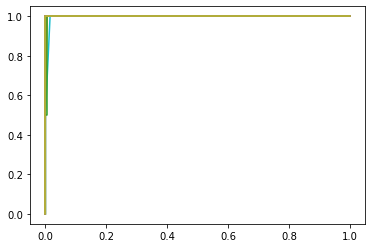

In [74]:
from sklearn.metrics import roc_curve
for i in range(0,99):
    fpr, tpr, thresholds = roc_curve(np.where(y_val== i , 1, 0), predict_probability[:,i] )
    plt.plot(fpr, tpr)

1.0

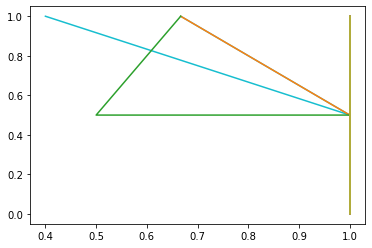

In [75]:
from sklearn.metrics import precision_recall_curve,auc
for i in range(0,99):
    precision , recall , _ = precision_recall_curve(np.where(y_val== i , 1, 0), predict_probability[:,i])
    plt.plot(precision, recall)
auc(recall, precision)    

## Now let's use another hard classifier (non-scoring) which means svc

In order to use SVC I have used LinearSVC model of sklearn. Since this is a multiclassification task, I have passed it as a parameter to a one versus all classifier. In addition, to calculate some of the metrics I need to know how classifier is confident in assigning samples to classes. This is where Calibrated ClassifierCV comes to rescue. Therefore, the classifier is a nested classifier of three classifiers, linear svc, onevsrestclassifier, and calibratedclassifiercv.

In [76]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
calibrated = CalibratedClassifierCV(OneVsRestClassifier(LinearSVC(max_iter = 2000)))

In [77]:
calibrated.fit(X_train_pt, y_train)

CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=LinearSVC(max_iter=2000)))

In [78]:
prediction_probability = calibrated.predict_proba(X_val_pt)

In [79]:
predict = calibrated.predict(X_val_pt)

In [80]:
predict.shape

(198,)

In [81]:
precision_score(y_val , predict , average = "micro")

0.9949494949494949

In [82]:
precision_score(y_val , predict , average = "macro")

0.9966329966329966

In [83]:
precision_score(y_val , predict , average = "weighted")

0.9966329966329966

In [84]:
recall_score(y_val, predict, average = "macro")

0.9949494949494949

In [85]:
recall_score(y_val, predictions, average = "micro")

0.9595959595959596

In [86]:
recall_score(y_val, predictions, average = "weighted")

0.9595959595959596

In [87]:
from sklearn.metrics import f1_score
f1_score(y_val, predict,average = "macro")

0.9946127946127946

### Different averaging techniques:

In above, I have used various averaging techniques to calculate precision and recall scores. But the question is, which one of them is more appropriate in our case?

Micro average gived the same importance to the samples, meaning that all the samples have the same contribution in calculating the scores. Since all the samples in our dataset has the same importance (we are not interested in a particular kind of samples) this is a appropriate averaging technique for us.

The differencebetween weighted and macro averaging comes into consideration when we face imbalanced datasets. More precisely, macro averaging gives the same importance to classes, when it computes the scores, while weighted averaging gives each class a weight corresponding to its size!

In our example the two macro and weighted averaging return the same value since our data set is totally balanced and all classes have the same sizes.

in general it seems that all the scores of precision, recall and f1 will improve by using linear svc.

In [88]:
roc_auc_score(y_val, prediction_probability, average="weighted", multi_class = 'ovr')


0.9999226963512678

the same for roc_auc_score

In [89]:
log_loss(y_val , predict_probability)

0.1519810018584489

However apparently there are more entropy loss! why is that? This means that the Support Vector Classifier is somehow overfit furing training.

smaller log_loss means more confidence in doing prediction

### Now let's to do a regularization by manipulating the margin of the svc.

To regularize the calibrated one Vs rest SVC, I have used the GridSearchCV. Note, that the SVC uses Rigde regression for its regularization. 

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer
params = { 'base_estimator__estimator__C': np.logspace(-3, 3, 7) }
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
gs_svm = GridSearchCV(calibrated , params, cv=5, scoring=LogLoss,n_jobs = -1)

In [111]:
calibrated.get_params().keys()

dict_keys(['base_estimator__estimator__C', 'base_estimator__estimator__class_weight', 'base_estimator__estimator__dual', 'base_estimator__estimator__fit_intercept', 'base_estimator__estimator__intercept_scaling', 'base_estimator__estimator__loss', 'base_estimator__estimator__max_iter', 'base_estimator__estimator__multi_class', 'base_estimator__estimator__penalty', 'base_estimator__estimator__random_state', 'base_estimator__estimator__tol', 'base_estimator__estimator__verbose', 'base_estimator__estimator', 'base_estimator__n_jobs', 'base_estimator', 'cv', 'ensemble', 'method', 'n_jobs'])

In [112]:
gs_svm.fit(X_train_pt, y_train)

GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=LinearSVC(max_iter=2000))),
             n_jobs=-1,
             param_grid={'base_estimator__estimator__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [102]:
calibrated_opt = gs_svm.best_estimator_
calibrated_opt.fit(X_train_pt, y_train)

CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=LinearSVC(C=0.01,
                                                                              max_iter=2000)))

In [113]:
predp = calibrated_opt.predict_proba(X_val_pt)

In [114]:
pred= calibrated_opt.predict(X_val_pt)

In [115]:
precision_score(y_val , pred , average = "micro")

0.98989898989899

In [124]:
precision_score(y_val , pred , average = "macro")

0.9932659932659934

In [126]:
precision_score(y_val , pred , average = "weighted")

0.9932659932659934

In [127]:
f1_score(y_val, predict,average = "macro")

0.9946127946127946

In [116]:
log_loss(y_val , predp)

0.996100118389783

As you can see, there is an improvement in the precision score, there is an increase in log_loss. This is quite normal because we regularize the model which means it will reduce its variance to have a better bias in doing prediction.

In [118]:
roc_auc_score(y_val, predp, average="weighted", multi_class = 'ovr')

0.9998453927025356

Finally, this model can be applied on the test data to do a prediction:

In [119]:
test = pd.read_csv('leafTest.csv')

In [120]:
test

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [121]:
test_o = pipeline.fit_transform(test)

In [122]:
test_o

array([[ 0.48715837, -0.37588611,  1.62343217, ..., -0.87935481,
        -0.2235066 ,  1.44289509],
       [-0.36474851, -0.63020781,  1.35911767, ..., -0.77361353,
         1.73392999,  1.24175535],
       [-1.184983  , -1.06801254, -1.70415338, ...,  0.40650484,
        -0.9351717 , -1.18422273],
       ...,
       [ 0.3701059 ,  0.55218709, -0.62293542, ..., -0.87935481,
         1.80137204, -0.57781408],
       [ 0.10839596, -0.37588611,  1.267856  , ..., -0.87935481,
         0.71002946,  0.21140112],
       [-1.184983  ,  1.7600532 , -1.88866358, ...,  0.40650484,
        -0.9351717 ,  0.15564651]])

In [123]:
calibrated.predict(test_o)

array([51, 50,  1, 19, 14,  3,  3, 28, 84,  8, 43, 74, 75, 10, 52, 46, 45,
       73, 13, 71, 61, 68, 57, 77,  1, 70, 28, 15, 35, 70, 53, 74, 47, 50,
        4, 36, 14, 55, 36, 93,  8, 32,  8,  9, 71, 70, 38, 23, 94, 18, 17,
        5, 55, 94, 14, 86, 62, 33, 51, 98, 88, 56, 21, 59, 65, 11, 48,  5,
       13,  4, 54, 57, 29,  7, 31, 98, 92, 84, 25, 10, 61, 43, 85, 24,  1,
        2, 24, 83, 40, 22, 48, 90, 25, 21, 37, 56, 41, 95,  7, 89, 98, 77,
        3, 12, 31, 84, 83, 96, 64, 72, 93, 93, 67, 30,  8, 88, 60, 87,  6,
       57, 34, 90, 60, 17, 75, 27, 51, 31, 39, 23, 24,  2, 41, 61, 24, 97,
       28, 28, 68, 81, 42, 51, 86, 62, 60, 52, 95, 64, 42, 96, 95, 20, 59,
       35, 86,  1, 26, 38, 43, 75, 20, 60, 46, 79, 22, 79, 69, 87, 65, 97,
       75, 21, 29, 21, 11, 10, 58, 94, 27, 22, 15, 45, 89, 54, 43,  5, 23,
       94, 40, 49, 89, 72, 36, 11, 64, 95, 18, 91, 29, 64, 80,  6, 78, 45,
       28,  9, 78, 90, 44, 89, 92, 13,  2, 59,  0, 96, 70, 32, 29, 78, 91,
       69, 44, 38,  5, 60